In [4]:
# Tell Jupyter to plot figure right in the page
# Module with plot capabilities
import matplotlib.pyplot as plt
import seaborn as sns
import hyperspy.api as hs

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Modules with reading/write folder/file functions
import os
from pathlib import Path
import SimpleITK as sitk

# module to deal with images
import uproot

# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path()

# Display the content of a folder
output_folder = Path('./output')
if not output_folder.is_dir():
    print('ERROR: {} is not a folder.'.format(output_folder))
else:
    print('The folder and contains the following files:'.format(output_folder))
    p = output_folder.glob('**/*')
    files = [x for x in p if x.is_file()]
    for x in files:
        print(x)

The Current Working Directory (CWD) is: 
 /workspace/gate/VHEE_monitor
The folder and contains the following files:
output/stats.txt
output/doselat_edep.raw
output/dose3d_dose_uncertainty.mhd
output/dose3d_dose_uncertainty.raw
output/dose3d_dose.mhd
output/dose3d_edep.raw
output/doselat_edep.mhd
output/dose3d_dose.raw
output/doselat_edep_uncertainty.raw
output/doselat_edep_uncertainty.mhd
output/dose3d_edep.mhd
output/spect.root


In [5]:
f = uproot.open('output/spect.root')
print("List of tree : \n", f.keys())
hits = f['Hits_crystal']
print('Number of hits:', hits.num_entries)
print('Hits keys: ')
for i in hits.keys():
    print(i, ' ', end='')

List of tree : 
 ['Hits_crystal;1']
Number of hits: 67071.0
Hits keys: 
PostPosition_X  PostPosition_Y  PostPosition_Z  PreKineticEnergy  TotalEnergyDeposit  PreDirection_X  PreDirection_Y  PreDirection_Z  

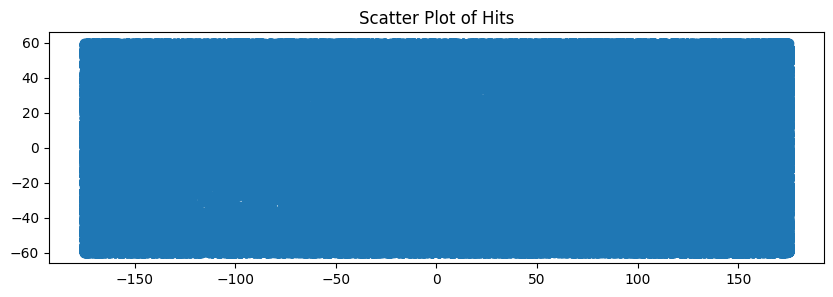

In [6]:
hits_y = np.array(hits.arrays()['PostPosition_Y'])
hits_z = np.array(hits.arrays()['PostPosition_Z'])
hits_x = np.array(hits.arrays()['PostPosition_X'])
preKinEnergy = np.array(hits.arrays()['PreKineticEnergy'])  
predirection_x = np.array(hits.arrays()['PreDirection_X'])
predirection_y = np.array(hits.arrays()['PreDirection_Y'])
predirection_z = np.array(hits.arrays()['PreDirection_Z'])



preKinEnergy_enwin = np.logical_and(preKinEnergy > 0, preKinEnergy < 2)

hits_y_enwin = hits_y[preKinEnergy_enwin]
hits_z_enwin = hits_z[preKinEnergy_enwin]
plt.figure(figsize=(10, 3))

plt.scatter(x=hits_z, y=hits_y)

plt.title('Scatter Plot of Hits')
plt.show()




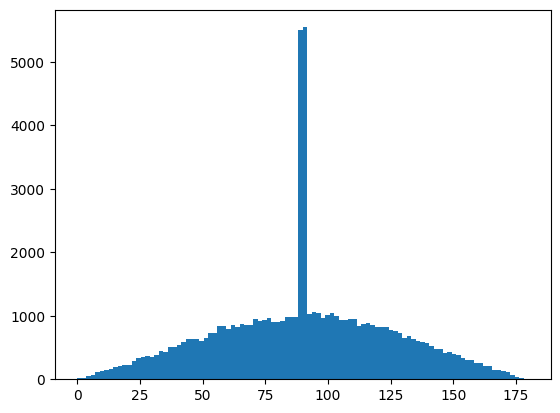

In [7]:
angle_with_z = np.arccos(predirection_z / np.linalg.norm([predirection_x, predirection_y, predirection_z], axis=0)) * 180 / np.pi


plt.hist(angle_with_z, bins=100, range=(0, 180))
plt.show()

In [8]:
# Define a tolerance for the angle near 90 degrees
tolerance = 1.0

# Create a mask for angles within the tolerance range of 90 degrees
angle_mask = np.abs(angle_with_z - 90) < tolerance

# Apply the mask to filter the hits
hits_x_90 = hits_x[angle_mask]
hits_y_90 = hits_y[angle_mask]
hits_z_90 = hits_z[angle_mask]

print("Number of hits with angle near 90 degrees:", len(hits_x_90))

Number of hits with angle near 90 degrees: 8238


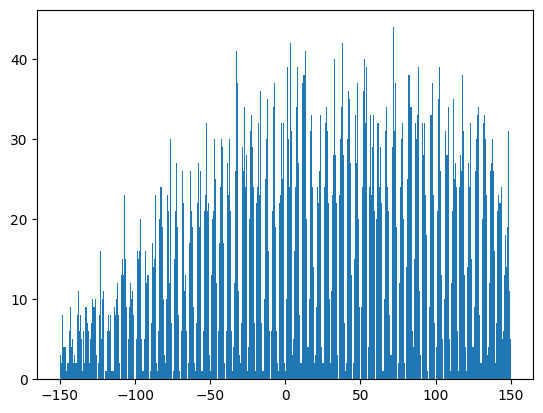

In [13]:
plt.hist(hits_z_90, bins=500, range=(-150, 150))
plt.show()

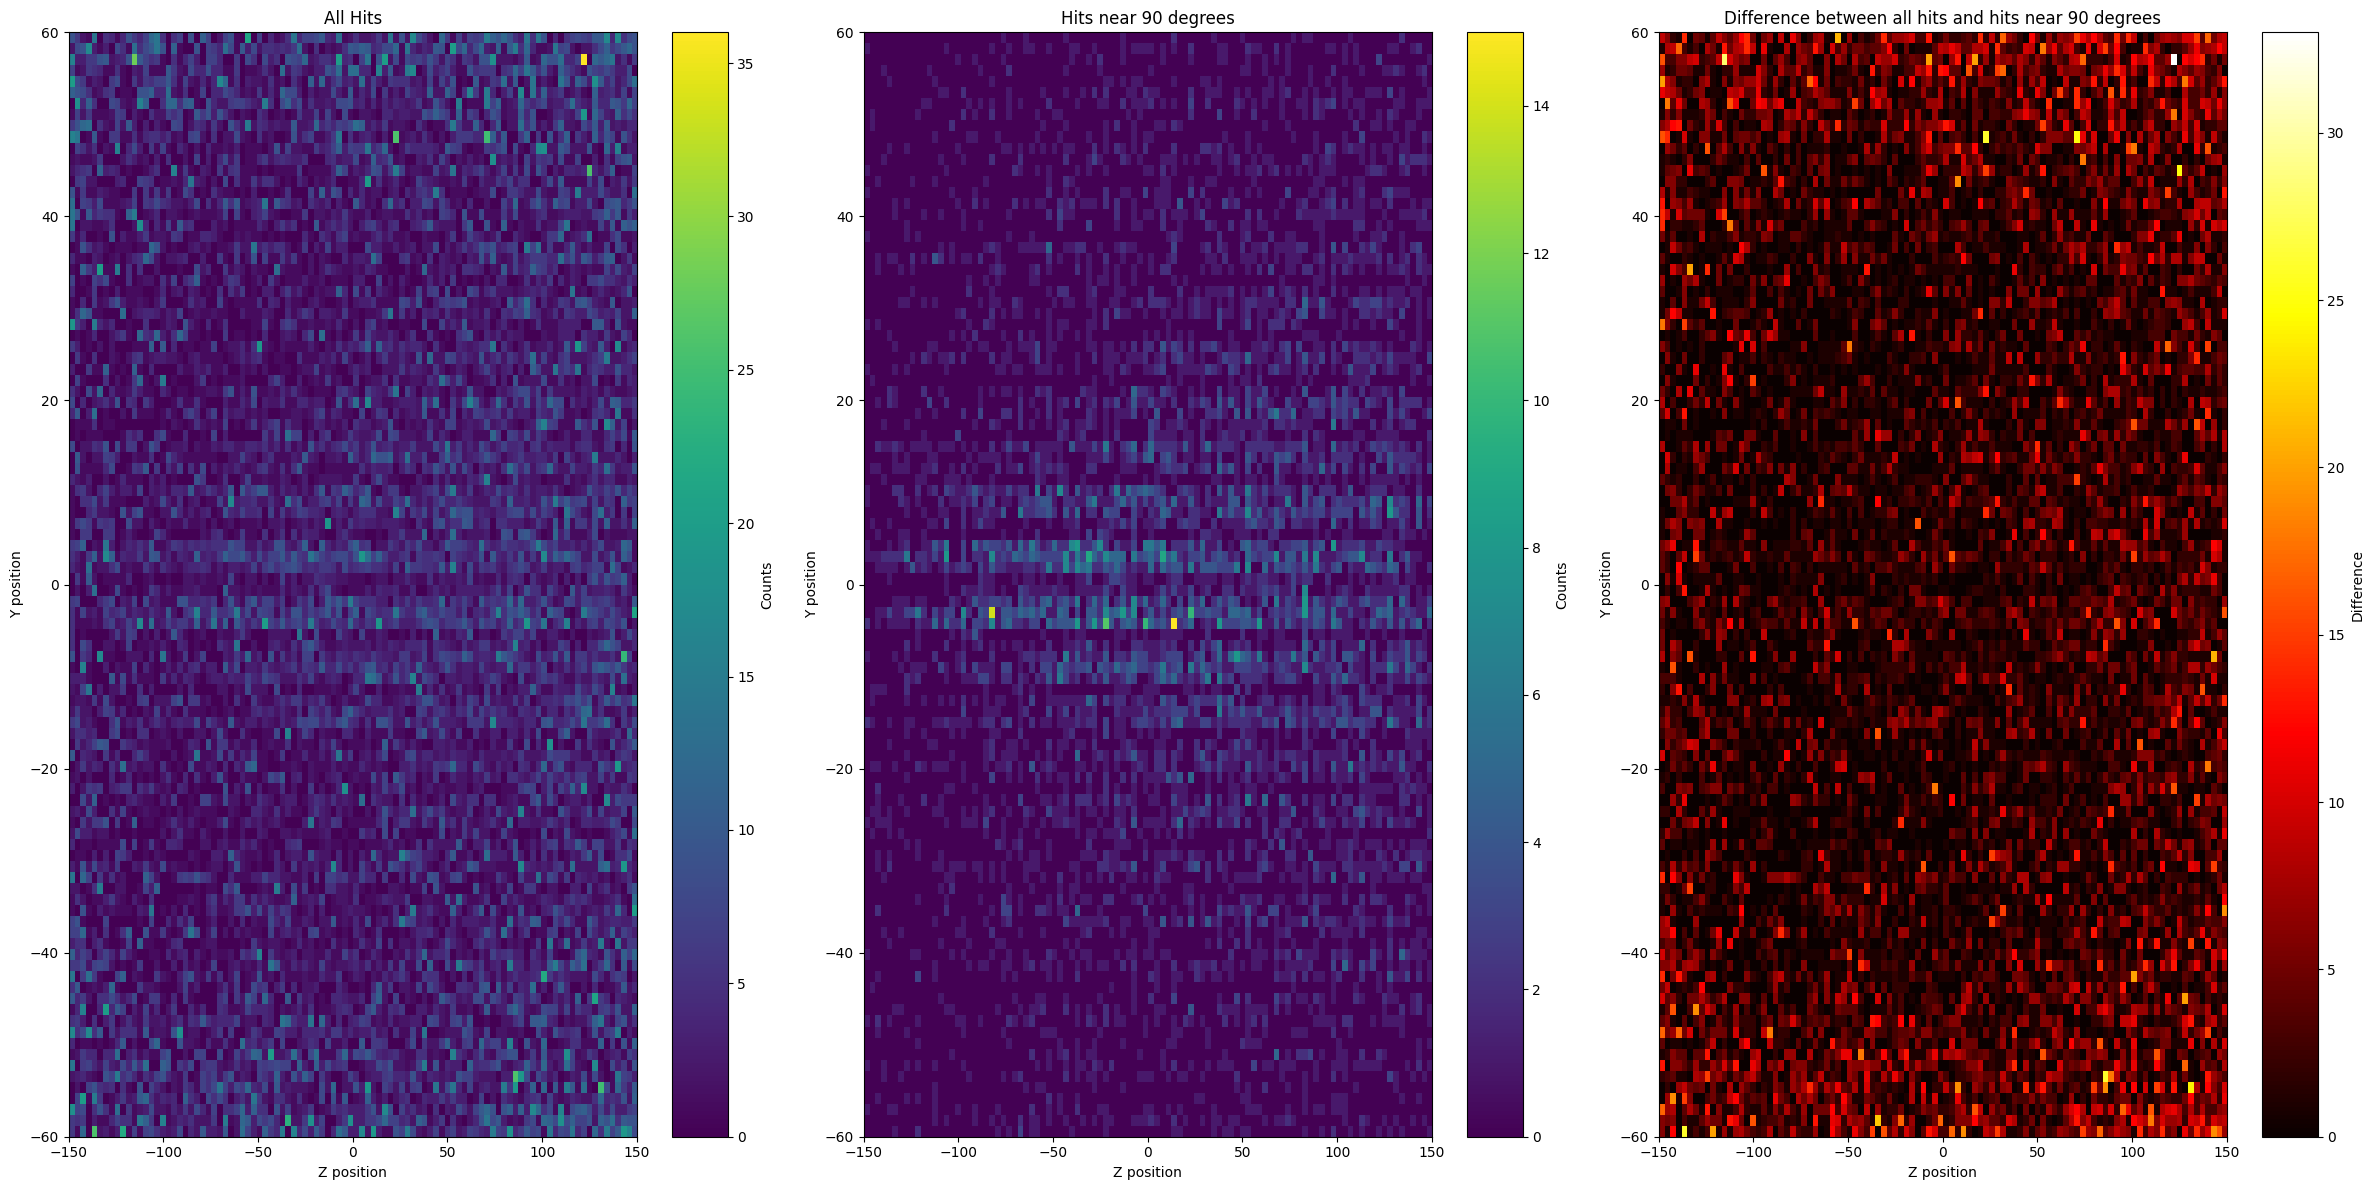

In [16]:



# Create 2D histograms
hist_all, xedges_all, yedges_all = np.histogram2d(hits_z, hits_y, bins=100, range=[[-150, 150], [-55, 55]])
hist_90, xedges_90, yedges_90 = np.histogram2d(hits_z_90, hits_y_90, bins=100, range=[[-150, 150], [-55, 55]])

# Calculate the difference
hist_diff = hist_all - hist_90

# Plot the difference
plt.figure(figsize=(24, 12))

plt.subplot(1, 3, 1)
plt.imshow(hist_all.T, origin='lower', extent=[-150, 150, -60, 60], aspect='auto', cmap='viridis')
plt.colorbar(label='Counts')
plt.title('All Hits')
plt.xlabel('Z position')
plt.ylabel('Y position')

plt.subplot(1, 3, 2)
plt.imshow(hist_90.T, origin='lower', extent=[-150, 150, -60, 60], aspect='auto', cmap='viridis')
plt.colorbar(label='Counts')
plt.title('Hits near 90 degrees')
plt.xlabel('Z position')
plt.ylabel('Y position')

plt.subplot(1, 3, 3)
plt.imshow(hist_diff.T, origin='lower', extent=[-150, 150, -60, 60], aspect='auto', cmap='hot')
plt.colorbar(label='Difference')
plt.title('Difference between all hits and hits near 90 degrees')
plt.xlabel('Z position')
plt.ylabel('Y position')

plt.tight_layout()
plt.show()

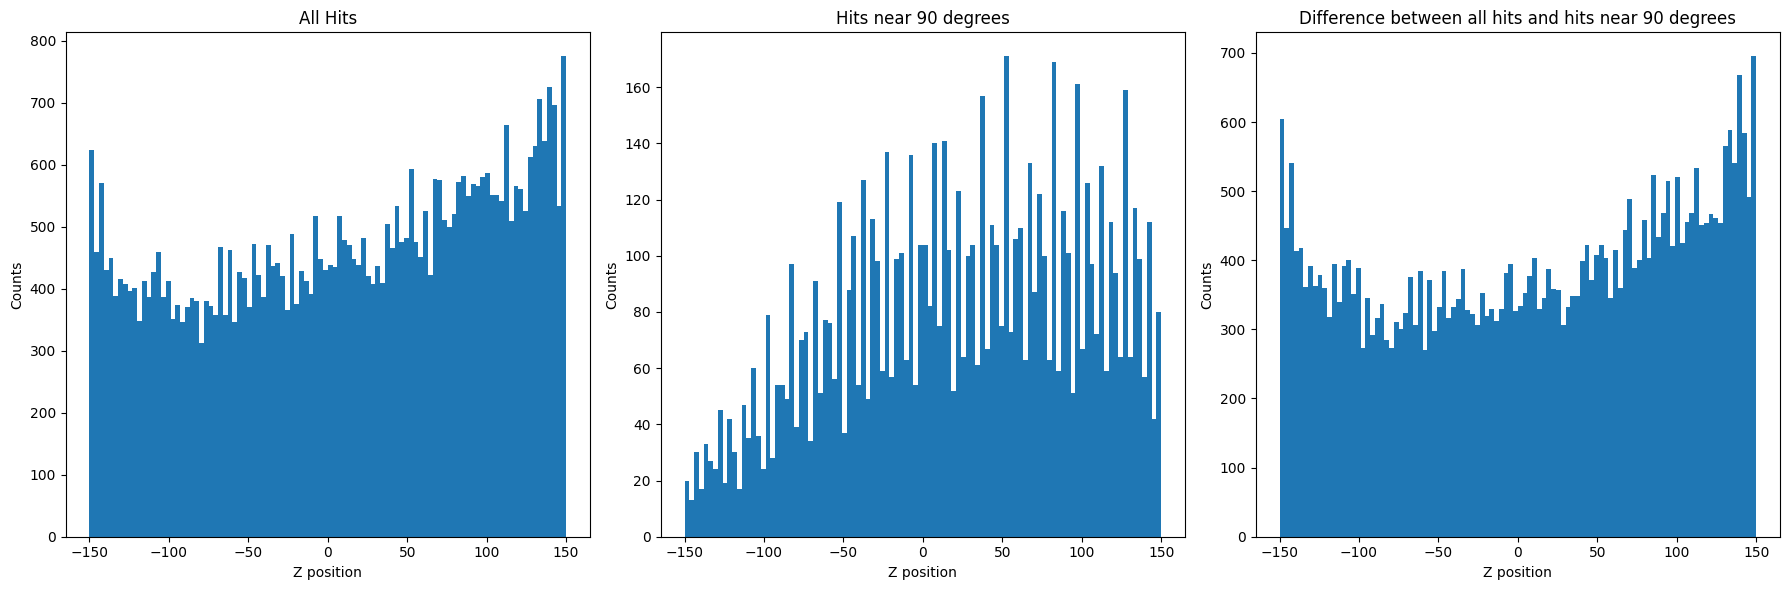

In [15]:

# Create 1D histograms for all hits and hits near 90 degrees
hist_all_1d, edges_all_1d = np.histogram(hits_z, bins=100, range=(-150, 150))
hist_90_1d, edges_90_1d = np.histogram(hits_z_90, bins=100, range=(-150, 150))

# Calculate the difference
hist_diff_1d = hist_all_1d - hist_90_1d

# Plot the histograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(hits_z, bins=100, range=(-150, 150))
plt.title('All Hits')
plt.xlabel('Z position')
plt.ylabel('Counts')

plt.subplot(1, 3, 2)
plt.hist(hits_z_90, bins=100, range=(-150, 150))
plt.title('Hits near 90 degrees')
plt.xlabel('Z position')
plt.ylabel('Counts')

plt.subplot(1, 3, 3)
plt.hist(edges_all_1d[:-1], bins=100, weights=hist_diff_1d, range=(-150, 150))
plt.title('Difference between all hits and hits near 90 degrees')
plt.xlabel('Z position')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()
